In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

En este caso nuestro objetivo es tratar con una red muy grande pero sin guardarlo en una variable de entorno en dado caso que haya poco espacio en la red

In [7]:
import pandas as pd
ruta = "C:/Users/pepe2/Documents/QuackRepository/Quack/Ciencia_de_Redes/socfb-Penn94.mtx"
datos = pd.read_csv(ruta,
                    # nrows = 10,
                    sep = " ",
                    header = None,
                    skiprows = 2,
                    usecols=[0,1]
                    )
datos

,0,1
0,522,1
1,577,1
2,604,1
3,988,1
4,1594,1
...,...,...
1362215,41518,41445
1362216,41469,41458
1362217,41493,41488
1362218,41496,41493


In [10]:
G = nx.from_pandas_edgelist(datos, 0, 1)

In [11]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)
p = k / (N-1)

grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

# se genera el dataframe (la tabla)
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df

K = df.Degree.max()

y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)

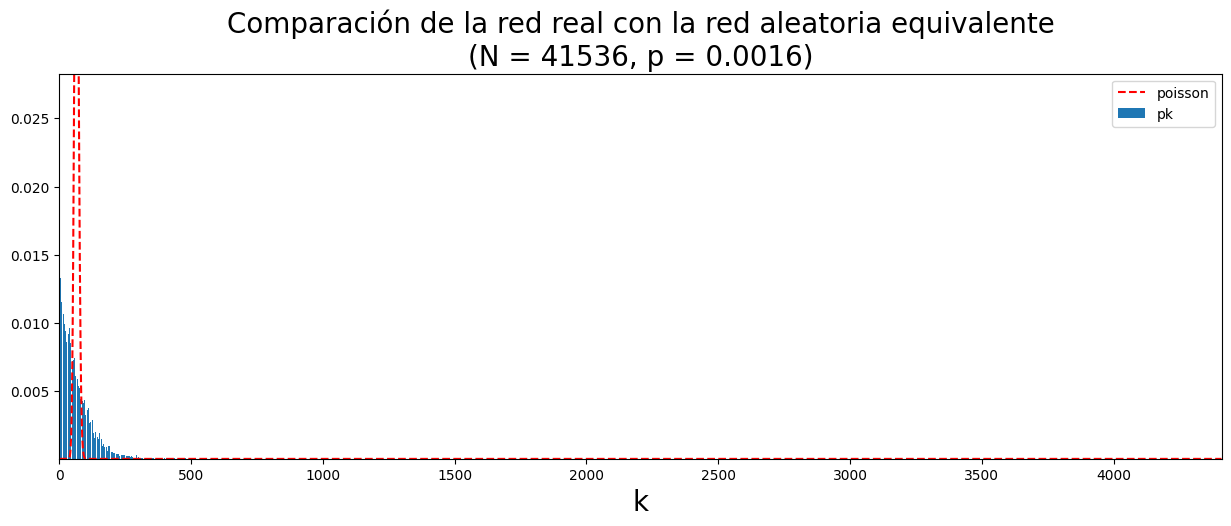

In [12]:
from scipy.stats import poisson

plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,x.max()])
plt.xlabel('k', size = 20)
plt.legend()
plt.show()

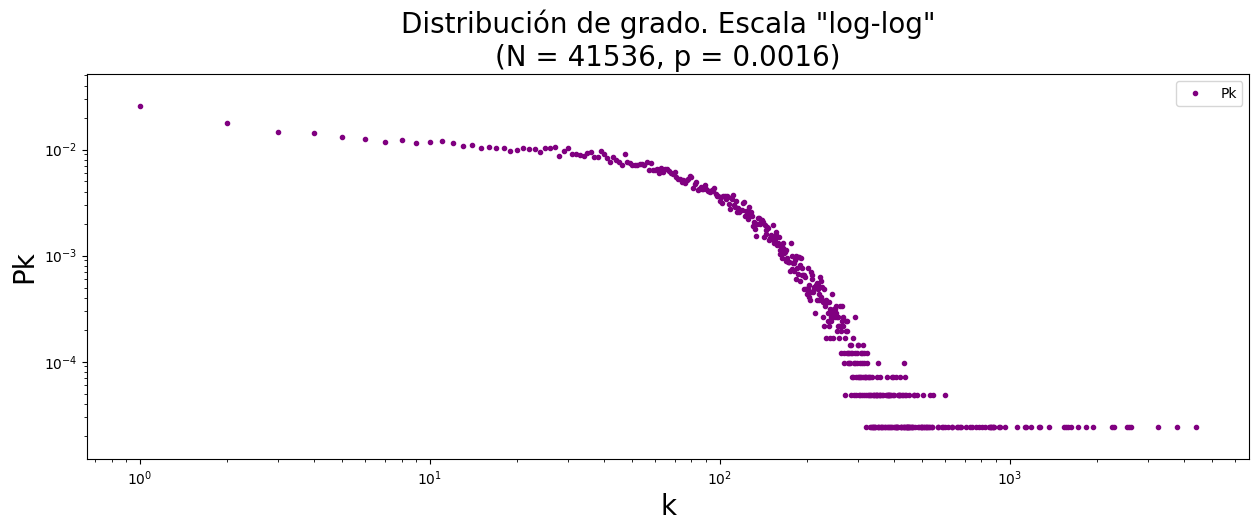

In [16]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = 'Pk',color = 'purple')
# plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])
plt.legend()

plt.title('Distribución de grado. Escala "log-log"\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)
plt.ylabel('Pk', size = 20)

plt.show()